# MAA307 Homework Assignment 2

#### Lucien Walewski and Aurele Bohbot

In [1]:
# Imports

import numpy as np
import matplotlib.pyplot as plt

## Exercise 6.11 A

### Part 1

We place ourselves in the framework of Exercise 6.8. We consider the problem
$$
\text{minimize}_{x\in\mathbb{R}^n} \frac{1}{2}\langle Ax,x\rangle - \langle b,x\rangle \quad\text{subject to} \quad Cx=d
$$
where $A\in\mathcal{M}_n(\mathbb{R})$ is symmetric positive definite, $b\in\mathbb{R}^n$, $C\in\mathcal{M}_{m,n}(\mathbb{R})$ is surjective, and $d\in\mathbb{R}^m$. We begin by considering the associated Lagrangian/dual problem given by:
$$
L(x, \lambda) = \frac{1}{2}\langle Ax,x\rangle - \langle b,x\rangle + \langle \lambda,Cx\rangle - \langle \lambda,d\rangle
$$
for $(x,\lambda)\in X\times\mathbb{R}^m$. 

Then, Uzawa's algorithm consists of the following:
\begin{align*}
    x^k\in\argmin_{x\in X} L(x, \lambda^k) \\
    \lambda^{k+1}=\lambda^k+\tau (Cx^k-d)
\end{align*}
We can explicitely compute the update step for $x_k$. We have
\begin{align*}
    x^k\in\argmin_{x\in X} L(x, \lambda^k)&\iff \nabla_x L(x^k, \lambda^k)=0 \\
    &\iff Ax^k-b+C^t\lambda^k =0 \\
    &\iff x^k=A^{-1}(b-C^t\lambda^k)
\end{align*}

We now implement the Uzawa algorithm for this problem.

In [39]:
def Uzawa(A, b, C, d, stepsize, tol, max_iter=None):
    # Initialization
    lambda_ = np.zeros(d.shape)
    invA = np.linalg.inv(A)
    x = invA @ (b - C @ lambda_)
    lambda_ = lambda_ + stepsize * (C @ x -d)
    iterations = 1
    while True:
        # Update
        x_new = invA @ (b - C @ lambda_)
        lambda_ = lambda_ + stepsize * (C @ x_new - d)
        iterations += 1
        # Stopping criterion
        if np.linalg.norm(x_new - x) < tol or iterations == max_iter:
            return x_new, lambda_, iterations
        x = x_new

In [73]:
# Example values

A = np.array([[2, 0], [0, 1]]) # Symmetric positive definite
C = np.array([[1,3], [2,1]]) # Surjective
d = np.array([3,1])
b = np.array([2,1])
tau = 0.1
tol = 1e-6

x, lambda_, _ = Uzawa(A, b, C, d, tau, tol)
print(f'Given A = {A}, C = {C}, d = {d}, b = {b}, τ = {tau}, tol = {tol}, the solution is {x}')

Given A = [[2 0]
 [0 1]], C = [[1 3]
 [2 1]], d = [3 1], b = [2 1], τ = 0.1, tol = 1e-06, the solution is [4.80550264e-06 9.99996586e-01]


### Convergence

We are given that a sufficient condition for convergence is
$$
    0 < \tau < \frac{2m_A}{M_C}
$$
where $m_A$ is the smallest eigenvalue of $A$ and $M_C$ is the largest eigenvalue of $C^tC$.

In order to demonstrate this condition, we vary $\tau$ and plot the convergence of the algorithm.

In [78]:
def compute_condition(A, C):
    m_A = min(np.linalg.eig(A)[0])
    M_C = max(np.linalg.eig(C.T @ C)[0])
    bound = 2 * m_A / M_C
    return m_A, M_C, bound

m_A, M_C, bound = compute_condition(A, C)

print(f'The smallest eigenvalue of A is {m_A} and the largest eigenvalue of C^tC is {M_C} so the bound is {bound}')

The smallest eigenvalue of A is 1.0 and the largest eigenvalue of C^tC is 19.48528137423857 so the bound is 0.102641576561691


/Users/lucienwalewski/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in matmul
  # This is added back by InteractiveShellApp.init_path()
/Users/lucienwalewski/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in matmul
  # Remove the CWD from sys.path while we load stuff.


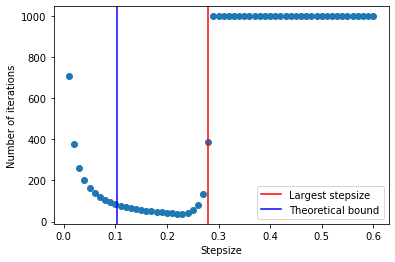

In [79]:
def plot_condition(A, b, C, d, tau, tol, max_iter):
    iterations = []
    stepsizes = []

    for tau in np.arange(0.01, bound + 0.5, 0.01):
        x, lambda_, iters = Uzawa(A, b, C, d, tau, tol, max_iter=1000)
        stepsizes.append(tau)
        iterations.append(iters)

    largest_stepsize = stepsizes[np.argmax(np.array(iterations) == 1000) - 1]
    plt.scatter(stepsizes, iterations)
    plt.xlabel('Stepsize')
    plt.ylabel('Number of iterations')
    plt.axvline(largest_stepsize, color='r', label='Largest stepsize')
    plt.axvline(bound, color='b', label='Theoretical bound')
    plt.legend()

plot_condition(A, b, C, d, tau, tol, max_iter=1000)

It can be seen in the scatter graph above that the condition is indeed sufficient but not necessary. We try some more examples to illustrate the condition.

/Users/lucienwalewski/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in matmul
  # This is added back by InteractiveShellApp.init_path()
/Users/lucienwalewski/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in matmul
  # Remove the CWD from sys.path while we load stuff.
/Users/lucienwalewski/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in subtract
  
/Users/lucienwalewski/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in matmul
  # Remove the CWD from sys.path while we load stuff.


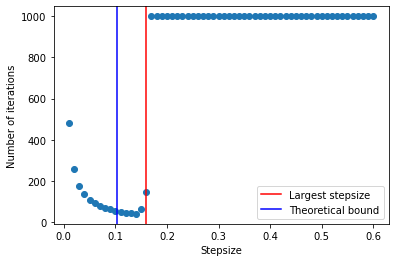

In [80]:
A = np.array([[1, 0], [0, 1]]) # Identity
C = np.array([[1,3], [2,1]]) # Surjective
d = np.array([3,1])
b = np.array([2,1])

plot_condition(A, b, C, d, tau, tol, max_iter=1000)

/Users/lucienwalewski/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in matmul
  # This is added back by InteractiveShellApp.init_path()
/Users/lucienwalewski/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in matmul
  # Remove the CWD from sys.path while we load stuff.


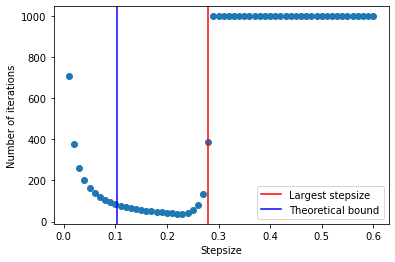

In [81]:
A = np.array([[5, 3], [0, 1]]) # Identity
C = np.array([[1,4], [2,1]]) # Surjective
d = np.array([3,2])
b = np.array([2,4])

plot_condition(A, b, C, d, tau, tol, max_iter=1000)

TODO: Compare with algebraic formulation of 6.8.1

### Part 2

We now implement the augmented Lagrangian method. The augmented Lagrangian of parameter $\beta>0$ for $(x,y)\in E\times Y$ is given by
\begin{align*}
    L_{\beta}(x,\lambda)&= \frac{1}{2}\langle Ax,x\rangle - \langle b,x\rangle + \langle \lambda,Cx-d\rangle + \frac{\beta}{2}\lVert Cx-d\rVert^2
\end{align*}

We derive our new update rules for $x^k$ and $\lambda^k$. We have
\begin{align*}
    x^k\in\argmin_{x\in X} L_{\beta}(x, \lambda^k)&\iff \nabla_x L_{\beta}(x^k, \lambda^k)=0 \\ 
    &\iff Ax^k-b+C^t\lambda^k +\beta C\lVert Cx^k-d\rVert=0 \\
    &\iff x^k=(A+\beta C^tC)^{-1}(b-C^t\lambda^k-\beta C^td)
\end{align*}
as well as
\begin{align*}
    \lambda_{k+1}=\lambda^k+\beta (Cx^k-d)
\end{align*}

We now implement the augmented Lagrangian method.

In [82]:
def uzawa_augmented(A, b, C, d, beta, tol, max_iter=None):
    # Initialization
    lambda_ = np.zeros(d.shape)
    inv = np.linalg.inv(A + beta * C.T @ C)
    x = inv @ (b - C @ lambda_ - beta * C.T @ d)
    lambda_ = lambda_ + beta * (C @ x -d)
    iterations = 1
    while True:
        # Update
        x_new = inv @ (b - C @ lambda_ - beta * C.T @ d)
        lambda_ = lambda_ + beta * (C @ x_new - d)
        iterations += 1
        # Stopping criterion
        if np.linalg.norm(x_new - x) < tol or iterations == max_iter:
            return x_new, lambda_, iterations
        x = x_new

We compare the augmented Lagrangian method with the Uzawa algorithm for the examples previously seen. 

In [94]:
def compare_methods(A, b, C, d):
    for beta in [0.1, 0.5, 1, 2]:
        x, lambda_, iters = Uzawa(A, b, C, d, tau, tol=1e-6)
        print(x)
        x, lambda_, iters = uzawa_augmented(A, b, C, d, beta, tol=1e-6)
        print(x)

# compare_methods(A, b, C, d)

In [96]:
A = np.array([[2, 0], [0, 1]]) # Symmetric positive definite
C = np.array([[1,3], [2,1]]) # Surjective
d = np.array([3,1])
b = np.array([2,1])
tau = 0.1
tol = 1e-6

compare_methods(A, b, C, d)

A = np.array([[1, 0], [0, 1]]) # Identity
C = np.array([[1,3], [2,1]]) # Surjective
d = np.array([3,1])
b = np.array([2,1])

compare_methods(A, b, C, d)

A = np.array([[5, 3], [0, 1]]) # Identity
C = np.array([[1,4], [2,1]]) # Surjective
d = np.array([3,2])
b = np.array([2,4])

compare_methods(A, b, C, d)

[4.80550264e-06 9.99996586e-01]
[5.27796386e-06 9.99996096e-01]
[4.80550264e-06 9.99996586e-01]
[9.96552176e-07 9.99999134e-01]
[4.80550264e-06 9.99996586e-01]
[5.76178233e-07 9.99999424e-01]
[4.80550264e-06 9.99996586e-01]
[2.58387772e-07 9.99999706e-01]
[2.32489972e-06 9.99998102e-01]
[3.48195224e-06 9.99996977e-01]
[2.32489972e-06 9.99998102e-01]
[6.85603619e-07 9.99999292e-01]
[2.32489972e-06 9.99998102e-01]
[3.19880284e-07 9.99999635e-01]
[2.32489972e-06 9.99998102e-01]
[3.35106602e-07 9.99999587e-01]
[0.71428075 0.57143119]
[0.71427984 0.57143199]
[0.71428075 0.57143119]
[0.71428645 0.57142786]
[0.71428075 0.57143119]
[0.71428629 0.57142791]
[0.71428075 0.57143119]
[0.71428645 0.57142768]
